In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the datasets
train_df = pd.read_csv('/content/drive/MyDrive/Tugas/Semester 7/NLP/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Tugas/Semester 7/NLP/test.csv')

# Instead of 'text', use the appropriate column containing the text data
# Assuming 'Description' column contains the text
X_train = train_df['Description'].tolist()  # List teks dari data training
y_train = (train_df['Class Index'] ).tolist()  # Label diubah agar mulai dari 1 # Assuming 'Class Index' is your label

# Similarly for the test set
X_test = test_df['Description'].tolist()  # List teks dari data testing
y_test = (test_df['Class Index']).tolist()  # Label diubah agar mulai dari 1

# Print untuk memastikan
print(f"Jumlah data di X_train: {len(X_train)}")
print(f"Contoh teks di X_train: {X_train[:2]}")
print(f"Contoh label di y_train: {y_train[:2]}")
print(f"Jumlah data di X_test: {len(X_test)}")
print(f"Contoh teks di X_test: {X_test[:2]}")
print(f"Contoh label di y_test: {y_test[:2]}")

Jumlah data di X_train: 120000
Contoh teks di X_train: ["Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.", 'Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.']
Contoh label di y_train: [3, 3]
Jumlah data di X_test: 7600
Contoh teks di X_test: ["Unions representing workers at Turner   Newall say they are 'disappointed' after talks with stricken parent firm Federal Mogul.", 'SPACE.com - TORONTO, Canada -- A second\\team of rocketeers competing for the  #36;10 million Ansari X Prize, a contest for\\privately funded suborbital space flight, has officially announced the first\\launch date for its manned rocket.']
Contoh label di y_test: [3, 4]


In [ ]:
import torch
import torch.nn as nn
import numpy as np
from databits import CreateModel
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

BATCH_SIZE = 32
SEQUENCE_LENGTH = 100
EPOCHS = 5
EMBED_DIM = 32
N_LAYERS = 2
DROPOUT_RATE = 0.1
NUM_CLASSES = len(np.unique(np.array(y_train)))
OPTIMIZER = torch.optim.Adam
LR = 0.001
LOSS = nn.CrossEntropyLoss

In [ ]:
model = CreateModel(X_train, y_train,
                 X_test, y_test,
                 batch=BATCH_SIZE,
                 seq=SEQUENCE_LENGTH,
                 embedding_dim=EMBED_DIM,
                 n_layers=N_LAYERS,
                 dropout_rate=DROPOUT_RATE,
                 num_classes=NUM_CLASSES)

Loading setup data ...
Loading train data ...
Loading val data ...
Successful load model


In [ ]:
model.BERT() # bert model

BERT(
  (embedding): Embedding(90728, 32)
  (positional_encoding): PositionalEncoding()
  (fc): Linear(in_features=32, out_features=32, bias=True)
  (out): Linear(in_features=32, out_features=4, bias=True)
)

In [ ]:
model.BERT()
history = model.fit(epochs=EPOCHS, optimizer=OPTIMIZER, lr=LR, loss=LOSS)

Validation: 100%|██████████| 238/238 [00:01<00:00, 155.49batch/s]


Epoch 1/5 | Train Loss: 0.8433 | Train Acc: 0.6383 | Val Loss: 0.4998 | Val Acc: 0.8205



Validation: 100%|██████████| 238/238 [00:01<00:00, 158.60batch/s]


Epoch 2/5 | Train Loss: 0.4132 | Train Acc: 0.8583 | Val Loss: 0.4068 | Val Acc: 0.8655



Validation: 100%|██████████| 238/238 [00:02<00:00, 111.00batch/s]


Epoch 3/5 | Train Loss: 0.3332 | Train Acc: 0.8875 | Val Loss: 0.3479 | Val Acc: 0.8812



Validation: 100%|██████████| 238/238 [00:01<00:00, 162.02batch/s]


Epoch 4/5 | Train Loss: 0.2886 | Train Acc: 0.9030 | Val Loss: 0.3241 | Val Acc: 0.8924



Validation: 100%|██████████| 238/238 [00:02<00:00, 114.87batch/s]

Epoch 5/5 | Train Loss: 0.2557 | Train Acc: 0.9135 | Val Loss: 0.3279 | Val Acc: 0.8936

Restored model to the best state based on validation loss.


In [ ]:
y_true, y_pred = model.eval() # no argumen needed

Validation: 100%|██████████| 238/238 [00:05<00:00, 42.07batch/s]


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Akurasi: {accuracy:.4f}")

cm = confusion_matrix(y_true, y_pred)
print(cm)

Precision: 0.8937
Recall: 0.8911
F1 Score: 0.8913
Akurasi: 0.8911
[[1629   66  136   69]
 [  16 1838   34   12]
 [  43   13 1697  147]
 [  45   25  222 1608]]


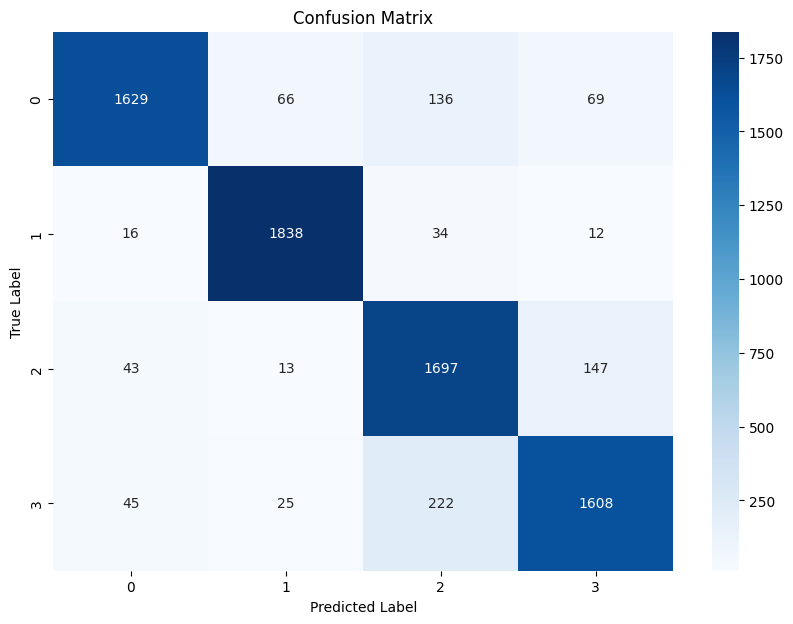

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# cm sudah dihitung pada kode sebelumnya
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ANALISIS

**Dataset (Apakah membutuhkan yang lebih besar?)**

Performanya cukup baik di atas 89%, yang menandakan bahwa dataset memiliki ukuran yang memadai. Namun, jika ingin meningkatkan performa lebih lanjut atau menghadapi kasus lain dengan variasi yang lebih besar, menambahkan data yang lebih beragam dapat membantu.

**Waktu dan Sumber Daya Komputasi**

Training 5 epoch membutuhkan sekitar 50 menit per epoch (estimasi dari log), dengan validation selesai dalam waktu yang jauh lebih cepat (~1 menit).
Dengan 77–79 batch/s selama training dan 110–160 batch/s untuk validation, prosesnya cukup efisien. aktu pelatihan sekitar 4–5 jam untuk 5 epoch bisa dianggap wajar, bergantung pada ukuran dataset dan kompleksitas model.

**Jelaskan Generalisasi**

Model menunjukkan generalisasi yang baik karena perbedaan antara training dan validation loss kecil serta akurasi konsisten.